# work flow

In [3]:
what_were_covering = {1: "data (prepare and load",
                      2: "build model",
                      3: "fitting the model to data(training)",
                      4: "making predictions and evaluating a model(inference",
                      5: "saving and loading the model",
                      6: "put it all together"}

what_were_covering

{1: 'data (prepare and load',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(inference',
 5: 'saving and loading the model',
 6: 'put it all together'}

In [4]:
import torch
from torch import nn  # nn contains all of pytorch's building blocks
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

## 1. preparing data
* Excel sheet
* images of any kind
* videos
* DNA
* text

1. get data to a numerical representation
2. build a model to learn a patterns in that numerical representation

In [5]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(
    dim=1)  # it needs another dimension which makes it some row with one column
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

## split data

In [7]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:],

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Vitalize

In [8]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.legend(prop={"size": 14})

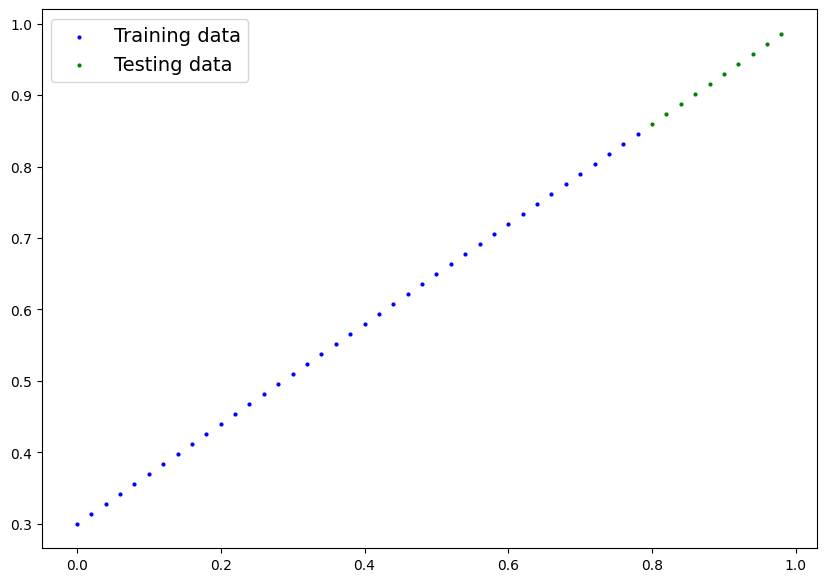

In [9]:
plot_predictions()

# building our first pytorch model

In [10]:
class LinearRegressionModel(nn.Module):  # almost Everything in pytorch inherit from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float))  #requared_grad default is True
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:  # x is the input
        return self.weights * x + self.bias


In [11]:
seed = 42
torch.manual_seed(seed)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

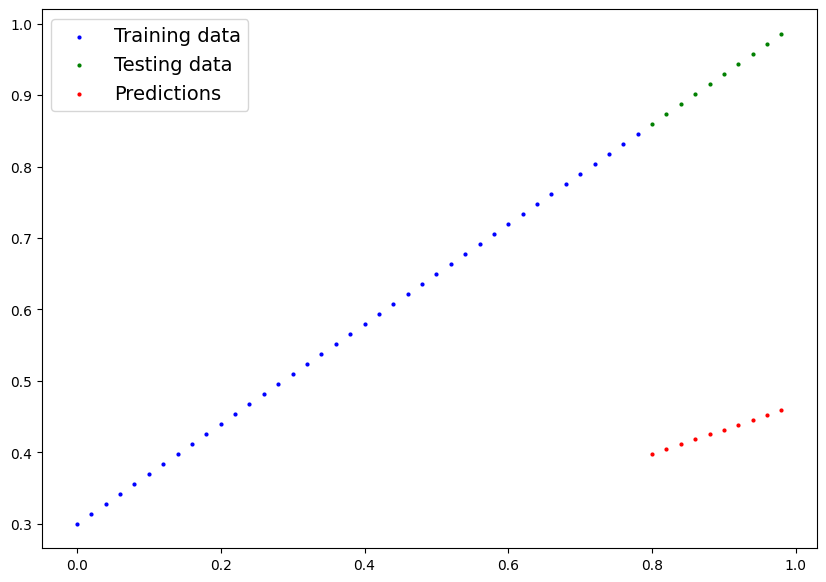

In [14]:
plot_predictions(predictions=y_pred)

In [15]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [16]:
epochs = 1000
for epoch in range(epochs):
    model_0.train()  # it is its default.. not necessary
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    print(f"loss is {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    print(model_0.state_dict())

loss is 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss is 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss is 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
loss is 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
loss is 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
loss is 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
loss is 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
loss is 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
loss is 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
loss is 0.20919232070446014
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.228

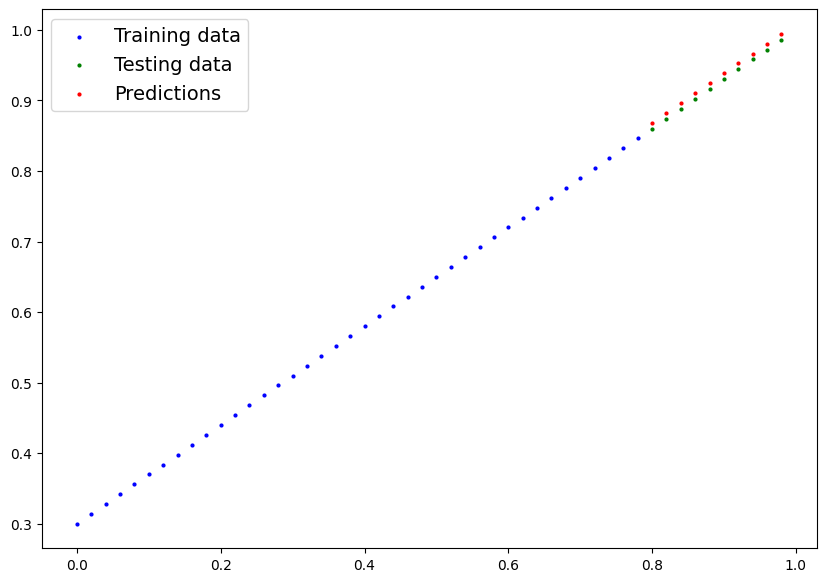

In [17]:
with torch.inference_mode():
    y_pred = model_0(X_test)
    plot_predictions(predictions=y_pred)

In [48]:
%load_ext autoreload
%autoreload 2
import Neural_Network as nnn

model = nnn.Neural_Net()
model, data = nnn.flow(model, [X_train, y_train], [X_test, y_test], epochs=1000, learning_rate=0.01)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Epoch:10 | Loss:0.2382 | Test_loss:0.2817
Epoch:20 | Loss:0.1230 | Test_loss:0.1469
Epoch:30 | Loss:0.0093 | Test_loss:0.0171
Epoch:40 | Loss:0.0033 | Test_loss:0.0068
Epoch:50 | Loss:0.0052 | Test_loss:0.0040
Epoch:60 | Loss:0.0052 | Test_loss:0.0040
Epoch:70 | Loss:0.0052 | Test_loss:0.0040
Epoch:80 | Loss:0.0052 | Test_loss:0.0040
Epoch:90 | Loss:0.0052 | Test_loss:0.0040
Epoch:100 | Loss:0.0052 | Test_loss:0.0040
Epoch:110 | Loss:0.0052 | Test_loss:0.0040
Epoch:120 | Loss:0.0052 | Test_loss:0.0040
Epoch:130 | Loss:0.0052 | Test_loss:0.0040
Epoch:140 | Loss:0.0052 | Test_loss:0.0040
Epoch:150 | Loss:0.0052 | Test_loss:0.0040
Epoch:160 | Loss:0.0052 | Test_loss:0.0040
Epoch:170 | Loss:0.0052 | Test_loss:0.0040
Epoch:180 | Loss:0.0052 | Test_loss:0.0040
Epoch:190 | Loss:0.0052 | Test_loss:0.0040
Epoch:200 | Loss:0.0052 | Test_loss:0.0040
Epoch:210 | Loss:0.0052 | Test_loss:0.0040
Epoch:220 | Loss:0

test loss is : 0.009510141797363758


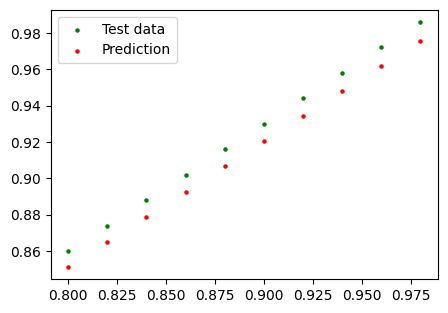

In [49]:
nnn.test(model, X_test, y_test)

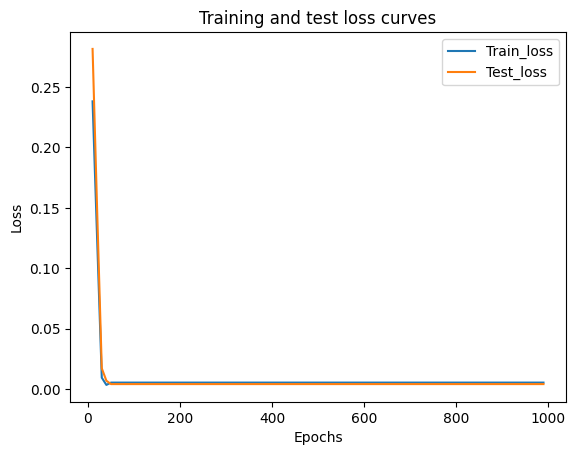

In [50]:
plt.plot(data[0], data[1], label="Train_loss")
plt.plot(data[0], data[2], label="Test_loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

# Saving Model

In [52]:
# first method 
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "01_pytorch_workflow.pth"
model_save_path = model_path / model_name

print(f"save model to {model_path}")
torch.save(model.state_dict(), f=model_save_path)

save model to models


In [55]:
loaded_mode = nnn.Neural_Net()
loaded_mode.load_state_dict(torch.load(f=model_save_path))
loaded_mode.state_dict()

OrderedDict([('weight', tensor([0.6914])), ('bias', tensor([0.2982]))])

In [56]:
loaded_mode.eval()
with torch.inference_mode():
    loaded_mode_pred = loaded_mode(X_test)

loaded_mode_pred

tensor([[0.8513],
        [0.8651],
        [0.8789],
        [0.8927],
        [0.9066],
        [0.9204],
        [0.9342],
        [0.9481],
        [0.9619],
        [0.9757]])

In [58]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)

y_pred == loaded_mode_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Redo everything in CUDA

# moduls

# data

In [67]:
weight = 0.7
bias = 0.3

star = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [59]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


# Split Data

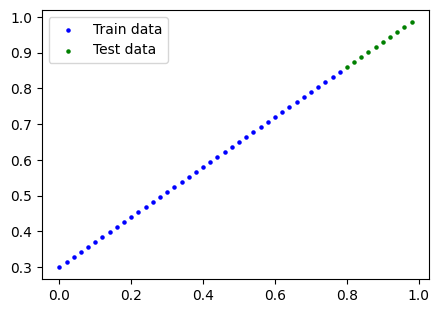

In [68]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
nnn.plot_predictions([X_train, y_train], [X_test, y_test])

In [69]:
class Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


torch.manual_seed(42)
model_1 = Linear()
model_1, model_1.state_dict()

(Linear(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [77]:
next(model_1.parameters()).device

device(type='cpu')

In [78]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

# Train

In [79]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [80]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [86]:
# seed = 42
epochs = 200

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | test_loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 10 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 20 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 30 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 40 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 50 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 60 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 70 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 80 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 90 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 100 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 110 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 120 | Loss: 0.0012645035749301314 | test_loss: 0.013801801018416882
Epoch: 130 | Loss: 0.001264503574930

In [87]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

# Test Part

In [88]:
model_1.eval()
with torch.inference_mode():
    y_pred = model_1(X_test)
y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

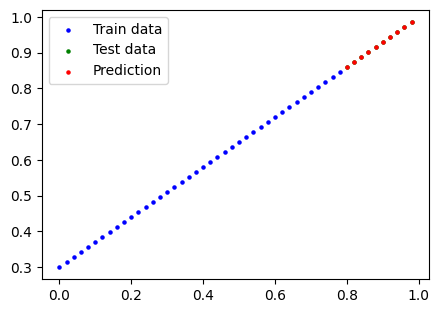

In [93]:

nnn.plot_predictions(train=[X_train.cpu(),y_train.cpu()], test=[X_test.cpu(),y_test.cpu()], prediction=y_pred.cpu())

# saving

In [94]:
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)
model_name = "01_python_workflow.pth"
model_save_path = model_path / model_name
print(f"saving model in {model_path}")
torch.save(obj=model_1.state_dict(), f=model_save_path)
print(f"saved successfully.")

saving model in models
saved successfully.


# load

In [97]:
loaded_model = Linear()
loaded_model.load_state_dict(torch.load(model_save_path))
next(loaded_model.parameters()).device

device(type='cpu')

In [104]:
loaded_model.to(device)
loaded_model.eval()
loss_fn = nn.L1Loss()
with torch.inference_mode():
    pred = loaded_model(X_test)
    loss = loss_fn(pred, y_test)

print(loss)

tensor(0.0003, device='cuda:0')


In [101]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]], device='cuda:0')